In [1]:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [4]:
#transposing for calculating sd and mean
dfStat=df.T.describe()
dfStat

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
#calculating confidence interval
yerr=1.96*dfStat.T['std']/np.sqrt(dfStat.T['count'])
yerr

1992    6508.897970
1993    3192.254314
1994    4553.902287
1995    2263.851744
dtype: float64

<IPython.core.display.Javascript object>


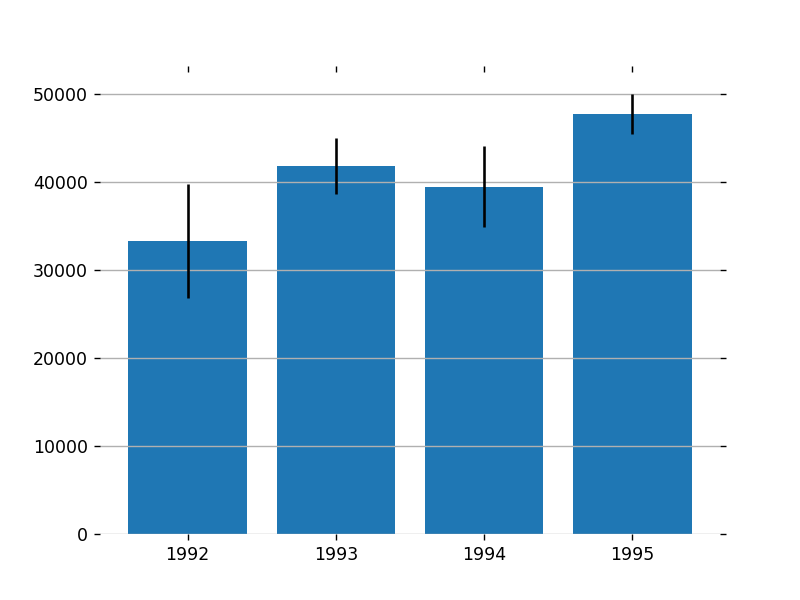

([<matplotlib.axis.XTick at 0x1a557fafec8>,
 <a list of 4 Text xticklabel objects>)

In [27]:
#plot the bar chart
plt.figure()
plt.bar(np.arange(1,5),df.mean(axis=1),yerr=yerr)
plt.xticks(np.arange(1,5),df.index)

In [30]:
#remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [13]:
df.mean(axis=1)

1992    33312.107476
1993    41861.859541
1994    39493.304941
1995    47743.550969
dtype: float64

In [32]:
#putting on a horizontal grid
plt.gca().yaxis.grid(True)
#removing all ticks and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='on', right='off', labelbottom='on')

In [35]:
#calculate means
m_val=df.mean(axis=1)
len(m_val)

4

In [66]:
import matplotlib
def get_color(pos, n_mval, yerr):    
    ## intensities
    dist = [pos]*len(m_val)-m_val
    norm = matplotlib.colors.Normalize(vmin=min(abs(dist)), vmax=max(abs(dist)))
    
    colors = list()
    for (d,err) in zip(dist,yerr):
        if d<0:
            ## define colors
            cmap = plt.cm.Reds
        if d>=0:
            ## define colors
            cmap = plt.cm.Blues
        colors.append(cmap(norm(abs(d))))
            
    return colors

In [67]:
get_color(40000,m_val,yerr)

[(0.0471357170319108, 0.3378239138792772, 0.6275278738946559, 1.0),
 (0.9923567858515956, 0.8095809304113802, 0.7323490965013456, 1.0),
 (0.9686274509803922, 0.984313725490196, 1.0, 1.0),
 (0.403921568627451, 0.0, 0.05098039215686274, 1.0)]

<IPython.core.display.Javascript object>


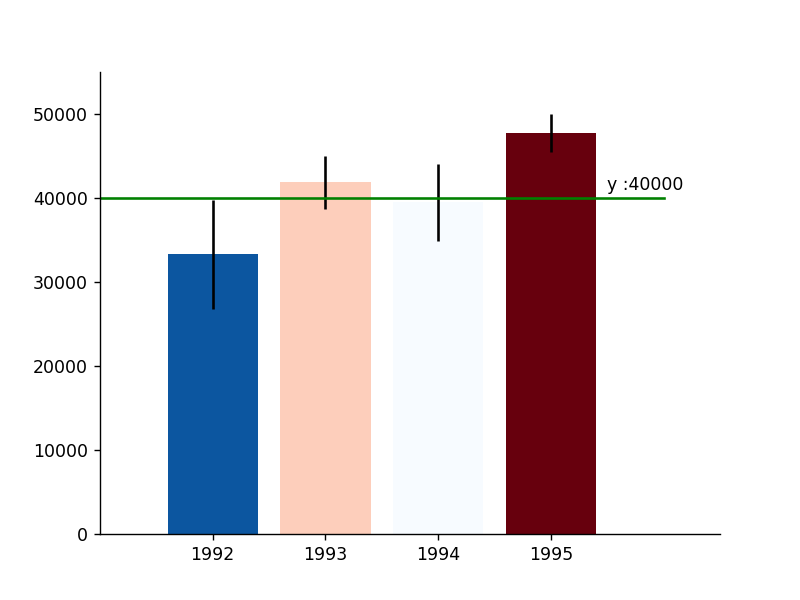

([<matplotlib.axis.XTick at 0x1a55aeb05c8>,
 <a list of 4 Text xticklabel objects>)

In [82]:
given =40000
f=plt.figure()
plt.bar(np.arange(1,5), m_val, yerr = yerr, color=get_color(given, m_val,yerr))
plt.xticks(np.arange(1,5), df.index)

In [83]:
#drawing horizontal line against the given value
plt.plot(np.arange(0,6),[given]*6,'g')
plt.annotate('y :{}'.format(given),[4.5,given+1000])

Text(4.5, 41000, 'y :40000')

In [84]:
#setting max and min to axis
plt.axis([0,5.5,0,55000])

[0, 5.5, 0, 55000]

In [85]:
#removing frame
for spine in plt.gca().spines.values():
    spine.set_visible(True)

In [86]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [79]:
plt.title('Ferreira et al, 2014')

Text(0.5, 1, 'Ferreira et al, 2014')

In [88]:
f.savefig("Pic3.jpg",bbox_inches='tight')